In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool

In [ ]:
data = pd.read_csv('/content/responce_train.csv')

In [ ]:
data.head(3)

,client_id,target,age,job-status,retrirement-status,gender,children,dependants,education,marital-status,...,reg-phone,work-phone,loans,paid-loans,total-payments,total-of-delinquencies,max-delinquency-no,mean-delinquency-amount,max-delinquency-amount,previous-cards
0,985668,0,41,1,0,1,3,1,Среднее специальное,Состою в браке,...,0,1,1,0,3,0,0,0.0,0.0,NaN
1,1006558,0,29,1,0,1,1,0,Высшее,Разведен(а),...,0,1,1,0,4,0,0,0.0,0.0,NaN
2,1000371,1,27,1,0,1,0,0,Среднее специальное,Не состоял в браке,...,0,1,1,0,8,0,0,0.0,0.0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25101 entries, 0 to 25100
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   client_id                               25101 non-null  int64  
 1   target                                  25101 non-null  int64  
 2   age                                     25101 non-null  int64  
 3   job-status                              25101 non-null  int64  
 4   retrirement-status                      25101 non-null  int64  
 5   gender                                  25101 non-null  int64  
 6   children                                25101 non-null  int64  
 7   dependants                              25101 non-null  int64  
 8   education                               25101 non-null  object 
 9   marital-status                          25101 non-null  object 
 10  industry                                22842 non-null  ob

In [ ]:
data.describe()

,client_id,target,age,job-status,retrirement-status,gender,children,dependants,personal-income,reg-and-fact-equality,...,reg-phone,work-phone,loans,paid-loans,total-payments,total-of-delinquencies,max-delinquency-no,mean-delinquency-amount,max-delinquency-amount,previous-cards
count,2.510100e+04,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,2.510100e+04,25101.000000,...,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,487.000000
mean,1.000514e+06,0.120314,40.384805,0.909127,0.133740,0.654157,1.092905,0.643719,1.435466e+04,0.836819,...,0.057169,0.909884,1.391140,0.756504,7.891757,0.190152,0.127007,231.677167,235.602035,1.008214
std,8.707073e+03,0.325335,11.615202,0.287434,0.340379,0.475652,0.988124,0.808145,8.244362e+04,0.369538,...,0.232170,0.286353,0.801786,0.992758,8.017568,0.675390,0.350361,797.830215,809.160352,0.090348
min,9.854680e+05,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+01,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.929560e+05,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+03,1.000000,...,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000545e+06,0.000000,39.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.200000e+04,1.000000,...,0.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.008049e+06,0.000000,50.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.700000e+04,1.000000,...,0.000000,1.000000,2.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.015599e+06,1.000000,67.000000,1.000000,1.000000,1.000000,10.000000,7.000000,1.300000e+07,1.000000,...,1.000000,1.000000,11.000000,11.000000,114.000000,13.000000,8.000000,28012.200000,28012.200000,2.000000


In [ ]:
x = data.drop(columns = ['client_id', 'target'])
y = data.target
x = x.fillna(-1000)



In [ ]:
x_ = pd.get_dummies(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size = 0.2)
classif = LogisticRegression(max_iter = 2000)
classif.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [ ]:
y_pred = classif.predict(x_train)
print('Train: accuracy = ', accuracy_score(y_train, y_pred), ', recall  = ', recall_score(y_train, y_pred),
      ', precision  = ', precision_score(y_train, y_pred), ', f1  = ', f1_score(y_train, y_pred))

Train: accuracy =  0.878585657370518 , recall  =  0.002055076037813399 , precision  =  0.3333333333333333 , f1  =  0.004084967320261438


In [ ]:
y_pred = classif.predict(x_test)
print('Test: accuracy = ', accuracy_score(y_test, y_pred), ', recall  = ', recall_score(y_test, y_pred),
      ', precision  = ', precision_score(y_test, y_pred), ', f1  = ', f1_score(y_test, y_pred))

Test: accuracy =  0.882692690699064 , recall  =  0.0034071550255536627 , precision  =  0.3333333333333333 , f1  =  0.006745362563237774


In [ ]:
!pip install catboost

In [ ]:
from catboost import Pool, CatBoostClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
train_pool = Pool(x_train, y_train, cat_features = ['education', 'marital-status', 'industry', 'title', 'tp-state', 'tp-foreign',
                                                    'job-type', 'family-income', 'registration-region', 'fact-region', 'last-loan-region',
                                                    'postal-region', 'region'])
test_pool = Pool(x_test, y_test, cat_features = ['education', 'marital-status', 'industry', 'title', 'tp-state', 'tp-foreign',
                                                    'job-type', 'family-income', 'registration-region', 'fact-region', 'last-loan-region',
                                                    'postal-region', 'region'])
classif = CatBoostClassifier()
classif.fit(train_pool)

Learning rate set to 0.037086
0:	learn: 0.6654771	total: 138ms	remaining: 2m 18s
1:	learn: 0.6387750	total: 212ms	remaining: 1m 46s
2:	learn: 0.6146548	total: 284ms	remaining: 1m 34s
3:	learn: 0.5927312	total: 358ms	remaining: 1m 29s
4:	learn: 0.5726615	total: 425ms	remaining: 1m 24s
5:	learn: 0.5550009	total: 491ms	remaining: 1m 21s
6:	learn: 0.5392741	total: 512ms	remaining: 1m 12s
7:	learn: 0.5242890	total: 581ms	remaining: 1m 12s
8:	learn: 0.5105833	total: 645ms	remaining: 1m 11s
9:	learn: 0.4979145	total: 703ms	remaining: 1m 9s
10:	learn: 0.4861134	total: 763ms	remaining: 1m 8s
11:	learn: 0.4750201	total: 827ms	remaining: 1m 8s
12:	learn: 0.4653232	total: 893ms	remaining: 1m 7s
13:	learn: 0.4559102	total: 958ms	remaining: 1m 7s
14:	learn: 0.4480045	total: 1.02s	remaining: 1m 7s
15:	learn: 0.4404930	total: 1.05s	remaining: 1m 4s
16:	learn: 0.4333591	total: 1.12s	remaining: 1m 4s
17:	learn: 0.4273975	total: 1.15s	remaining: 1m 2s
18:	learn: 0.4216969	total: 1.21s	remaining: 1m 2s
19

In [ ]:
y_pred = classif.predict(x_train)
print('Train: accuracy = ', accuracy_score(y_train, y_pred), ', recall  = ', recall_score(y_train, y_pred),
      ', precision  = ', precision_score(y_train, y_pred), ', f1  = ', f1_score(y_train, y_pred))

Train: accuracy =  0.8877490039840638 , recall  =  0.07439375256884505 , precision  =  0.9890710382513661 , f1  =  0.13837920489296637


<Axes: >

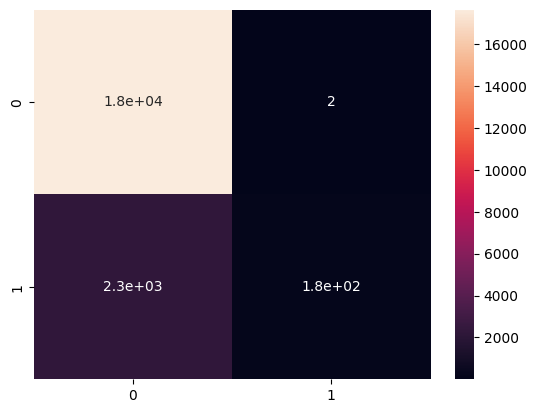

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot= True)

In [ ]:
y_pred = classif.predict(x_test)
print('Test: accuracy = ', accuracy_score(y_test, y_pred), ', recall  = ', recall_score(y_test, y_pred),
      ', precision  = ', precision_score(y_test, y_pred), ', f1  = ', f1_score(y_test, y_pred))

Test: accuracy =  0.8814977096195977 , recall  =  0.008517887563884156 , precision  =  0.2777777777777778 , f1  =  0.01652892561983471


<Axes: >

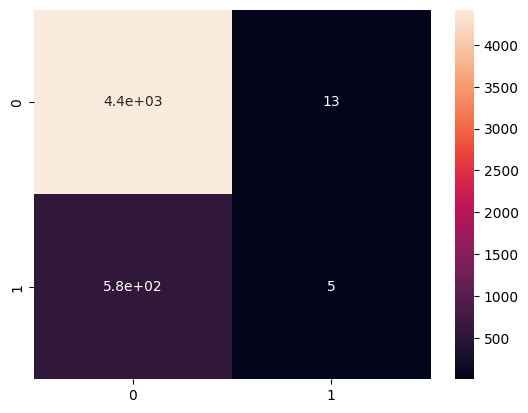

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)